In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
df=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Countplot of Math Score')

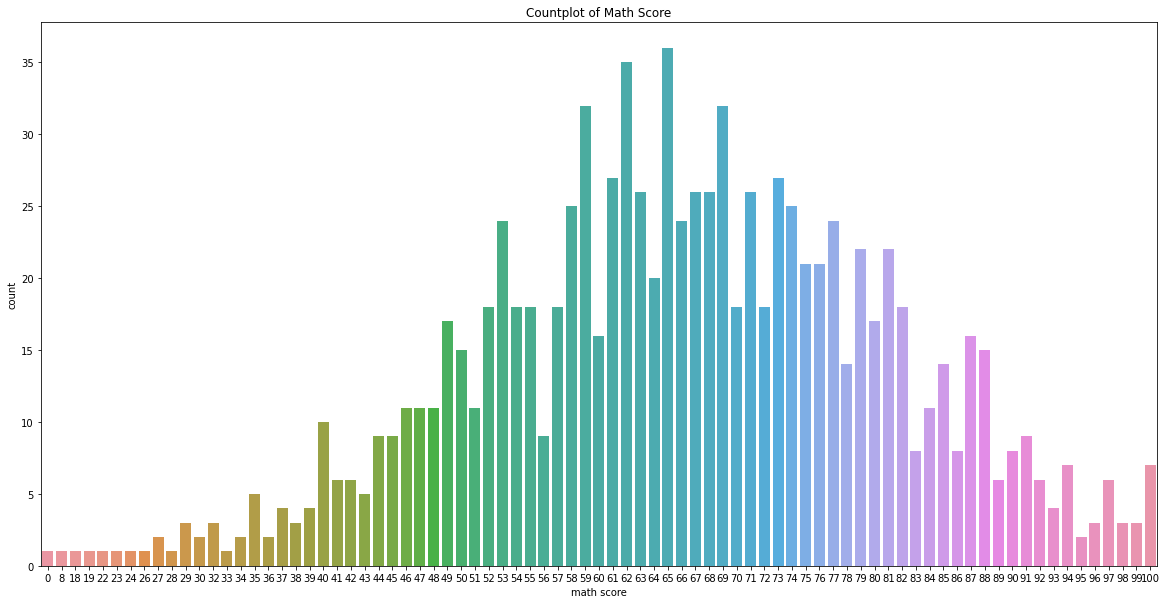

In [4]:
plt.figure(figsize=(20,10))
sns.countplot(df["math score"])
plt.title(("Countplot of Math Score"))

In [5]:
df['MathPassStatus']=np.where(df['math score']<40, "Fail", "Pass")

In [6]:
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,MathPassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass
1,female,group C,some college,standard,completed,69,90,88,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass
4,male,group C,some college,standard,none,76,78,75,Pass
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,Pass
996,male,group C,high school,free/reduced,none,62,55,55,Pass
997,female,group C,high school,free/reduced,completed,59,71,65,Pass
998,female,group D,some college,standard,completed,68,78,77,Pass


In [7]:
df.MathPassStatus.value_counts()

Pass    960
Fail     40
Name: MathPassStatus, dtype: int64

In [8]:

value=df["race/ethnicity"].value_counts().rename_axis('type').reset_index(name='counts')
value


,type,counts
0,group C,319
1,group D,262
2,group B,190
3,group E,140
4,group A,89


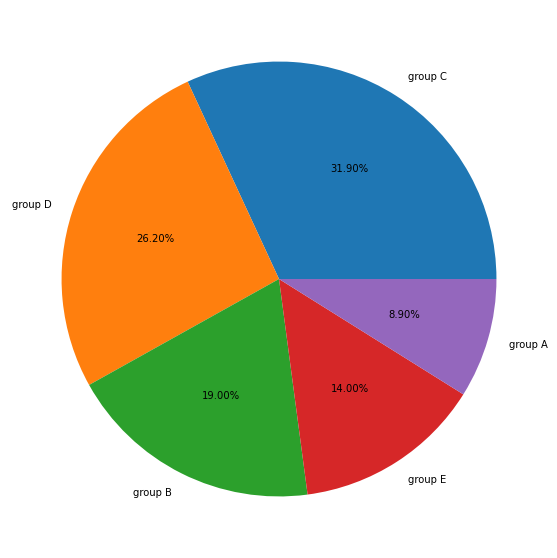

In [9]:
plt.figure(figsize=(10,10))
plt.pie(value['counts'],labels=value['type'],autopct='%1.2f%%')
plt.show()

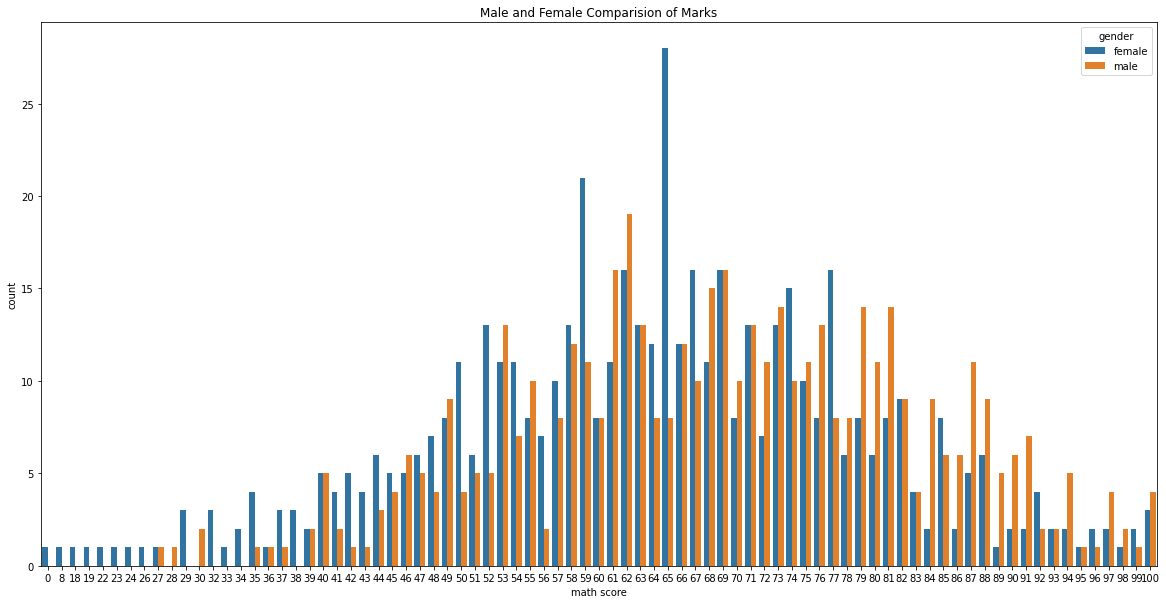

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x=df["math score"],hue=df['gender'])
plt.title("Male and Female Comparision of Marks")
plt.show()